In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *

### Wczytanie i preprocessing danych

#### Dane trywialne

In [231]:
dane = pd.DataFrame({'x' : [2, 1, 0, -1, -2, -1,  0,  1],
                     'y' : [0, 1, 2,  1,  0, -1, -2, -1],
                     'c' : [0, 1, 2,  3,  4,  5,  6,  7]})

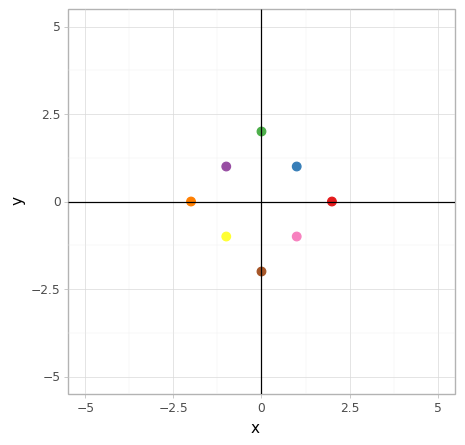

<ggplot: (108228981869)>

In [232]:
(ggplot(dane, aes('x','y', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() + 
 theme(figure_size=(5, 5)) +
 xlim(-5,5) +
 ylim(-5,5) 
)

In [233]:
# A = np.array([[2,0],[0,1]])
# A = np.array([[1,0],[0,-0.5]])
# A = np.array([[0,2],[1,0]])

A = np.array([[3,0],[4,5]])
print(A)

[[3 0]
 [4 5]]


In [234]:
dane[['x_A', 'y_A']] = np.matmul(dane.iloc[:,:2], A)

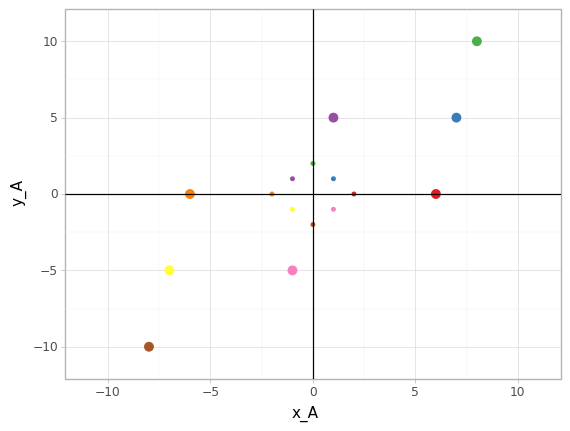

<ggplot: (108248470673)>

In [235]:
(ggplot(dane, aes('x_A','y_A', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-11,11) +
 ylim(-11,11) 
)

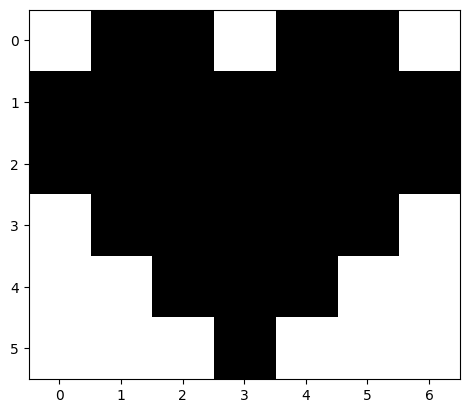

In [236]:
serce = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
plt.imshow(1-serce, cmap='gray')
plt.show()

#### Dane rzeczywiste

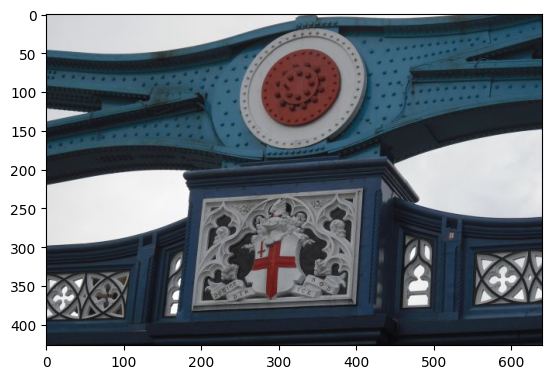

In [237]:
most = plt.imread('most.jpg', format='jpeg')
plt.imshow(most)
plt.show()

#### Zadanie - Most ...

Przekształć kolorowy obrazek do postaci czarno-białej.

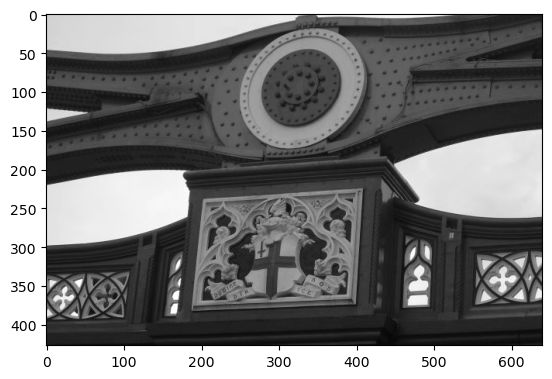

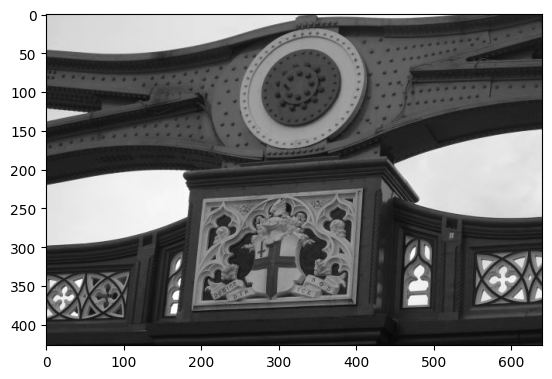

In [238]:
most_sr = np.mean(most, -1)
plt.imshow(most_sr, cmap='gray')
plt.show()

In [239]:
rozmiar = np.prod(most.shape)
print(f'Rozmiar danych to {rozmiar}')

Rozmiar danych to 819840


### Rozkład według wartości osobliwych (**SVD** - *Singular Value Decomposition*)

każdą macierz rzeczywistą $A$ można przedstawić w postaci dekompozycji na iloczyn trzech specyficznych macierzy:

$$ A=U\Sigma V^{T},$$


gdzie:

$U$ i $V$ – macierze ortogonalne (czyli $U^{-1}=U^{T}$ $V^{-1}=V^T)$,

$\Sigma$  – macierz diagonalna, taka że $\Sigma={diag}(\sigma _{i})$ gdzie $\sigma_{i}$ – nieujemne wartości szczególne (osobliwe) macierzy $A$, zwyczajowo uporządkowane nierosnąco.

In [320]:
from numpy.linalg import svd

In [321]:
A

array([[3, 0],
       [4, 5]])

#### Przykład trywialny

In [322]:
U,S,V = svd(A)
sigma = np.diag(S)

In [323]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz sigma ma wymiary {sigma.shape}')
print(f'Macierz V ma wymiary {V.shape}')

Macierz U ma wymiary (2, 2)
Macierz sigma ma wymiary (2, 2)
Macierz V ma wymiary (2, 2)


In [324]:
print(np.matmul(U, U.T).round(2))
print(np.matmul(V.T, V).round(2))

[[1. 0.]
 [0. 1.]]
[[ 1. -0.]
 [-0.  1.]]


In [325]:
dane[['x_SVD', 'y_SVD']] = np.matmul(dane.iloc[:,:2],np.matmul(np.matmul(U, sigma), V))

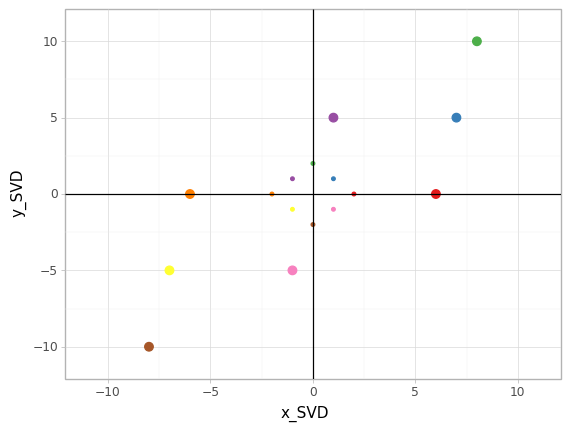

<ggplot: (108236272038)>

In [326]:
(ggplot(dane, aes('x_SVD','y_SVD', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-11,11) +
 ylim(-11,11) 
)

#### Obrót zgodnie z macierzą $U$

In [327]:
U

array([[-0.31622777, -0.9486833 ],
       [-0.9486833 ,  0.31622777]])

In [328]:
dane[['x_U', 'y_U']] = np.matmul(dane.iloc[:,:2], U)

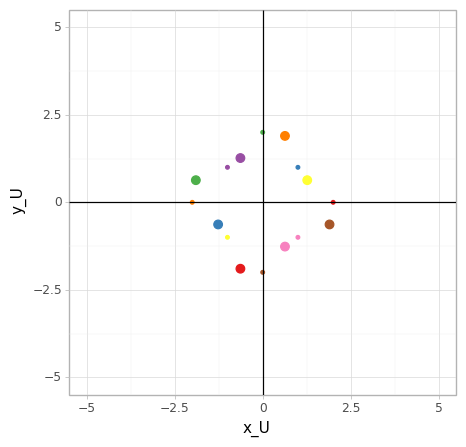

<ggplot: (108201389198)>

In [329]:
(ggplot(dane, aes('x_U','y_U', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() +
 theme(figure_size=(5, 5)) +
 xlim(-5,5) +
 ylim(-5,5) 
)

#### Rozciągnięcie zgodnie z macierzą $\sigma$

In [330]:
S
# sigma

array([6.70820393, 2.23606798])

In [331]:
dane[['x_S', 'y_S']] = np.matmul(dane.iloc[:,:2], sigma)

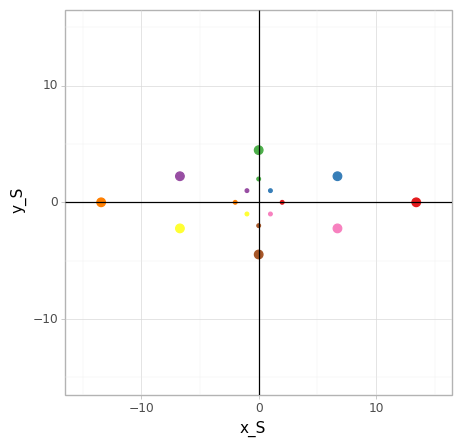

<ggplot: (108201400339)>

In [332]:
(ggplot(dane, aes('x_S','y_S', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() +
 theme(figure_size=(5, 5)) +
 xlim(-15,15) +
 ylim(-15,15) 
)

#### Obrót zgodnie z macierzą $V$

In [333]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [334]:
dane[['x_V', 'y_V']] = np.matmul(dane.iloc[:,:2], V)

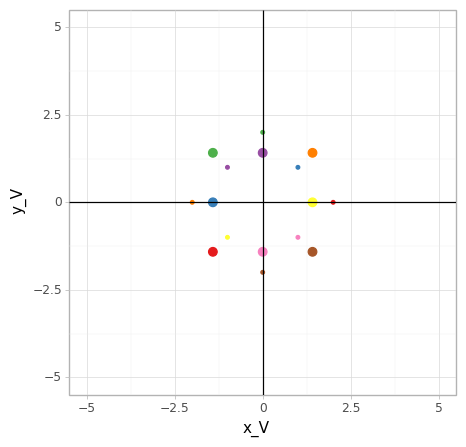

<ggplot: (108237711418)>

In [335]:
(ggplot(dane, aes('x_V','y_V', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() +
 theme(figure_size=(5, 5)) +
 xlim(-5,5) +
 ylim(-5,5) 
)

In [336]:
proc_waz = S/sum(S)
print(proc_waz)

[0.75 0.25]


#### Odtworzenie przekształcenia $A$ za pomocą jednej wartości osobliwej

In [337]:
k = 1
Uk=U[:,:k]
Vk=V[:k,:]
Sk=S[:k]

In [338]:
print(f'Macierz Uk ma wymiary {Uk.shape}')
print(f'Macierz Sk ma wymiary {Sk.shape}')
print(f'Macierz Vk ma wymiary {Vk.shape}')

Macierz Uk ma wymiary (2, 1)
Macierz Sk ma wymiary (1,)
Macierz Vk ma wymiary (1, 2)


In [339]:
dane[['x_SVD1', 'y_SVD1']] = np.matmul(dane.iloc[:,:2],np.matmul(np.outer(Uk, Sk), Vk))

In [340]:
dane[['x_SVD1', 'y_SVD1']]

,x_SVD1,y_SVD1
0,3.0,3.0
1,6.0,6.0
2,9.0,9.0
3,3.0,3.0
4,-3.0,-3.0
5,-6.0,-6.0
6,-9.0,-9.0
7,-3.0,-3.0


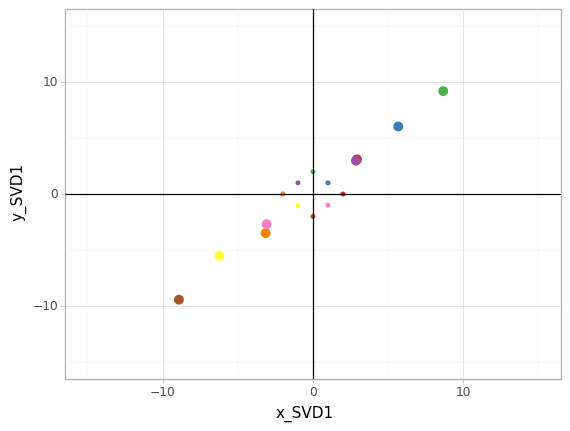

<ggplot: (108237711547)>

In [341]:
(ggplot(dane, aes('x_SVD1','y_SVD1', color = 'factor(c)')) +
 geom_jitter(size = 3, show_legend = False, width=0.5, height=0.5) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-15,15) +
 ylim(-15,15) 
)

#### Serce

In [342]:
n = len(serce)
U, S, V = svd(serce)
sigma = np.diag(S)

In [343]:
print(np.matmul(U, U.T).round(2))
print(np.matmul(V, V.T).round(2))

[[ 1. -0. -0.  0.  0. -0.]
 [-0.  1.  0. -0.  0.  0.]
 [-0.  0.  1.  0. -0. -0.]
 [ 0. -0.  0.  1. -0.  0.]
 [ 0.  0. -0. -0.  1. -0.]
 [-0.  0. -0.  0. -0.  1.]]
[[ 1. -0.  0. -0.  0.  0.  0.]
 [-0.  1.  0. -0. -0. -0.  0.]
 [ 0.  0.  1.  0.  0.  0. -0.]
 [-0. -0.  0.  1. -0.  0.  0.]
 [ 0. -0.  0. -0.  1.  0. -0.]
 [ 0. -0.  0.  0.  0.  1. -0.]
 [ 0.  0. -0.  0. -0. -0.  1.]]


In [344]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz S ma wymiary {S.shape}')
print(f'Macierz sigma ma wymiary {sigma.shape}')
print(f'Macierz V ma wymiary {V.shape}')

sigma_to_V = np.c_[sigma, np.zeros((n, V.shape[0]-n))]
print(f'Macierz sigma_to_V ma wymiary {sigma_to_V.shape}')

Macierz U ma wymiary (6, 6)
Macierz S ma wymiary (6,)
Macierz sigma ma wymiary (6, 6)
Macierz V ma wymiary (7, 7)
Macierz sigma_to_V ma wymiary (6, 7)


In [345]:
print(np.matmul(U, sigma).shape)
# print(np.matmul(np.matmul(U, sigma), V.T).shape)

# print(np.matmul(np.matmul(U, sigma_to_V), V.T).shape)

(6, 6)


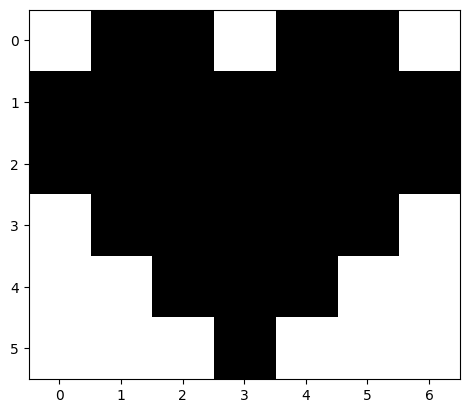

In [346]:
obraz_all = np.matmul(np.matmul(U, sigma_to_V), V)
plt.imshow(1-obraz_all, cmap='gray')
plt.show()

#### Zadanie - obrazy każdej wartości osobliwej

Przygotuj macierze rezprezentujące obrazy każdej wartości osobliwej. 

In [347]:
# Miejsce na twój kod
m = V.shape[1]
imgs = []
for k in range (1, m):
    Uk=U[:,k-1:k]
    Vk=V[k-1:k,:]
    Sk=S[k-1:k]
    imgs.append(np.matmul(np.outer(Uk, Sk), Vk))

In [348]:
m

7

#### Zadanie - skumulowane obrazy kolejnych wartości osobliwych

Przygotuj macierze rezprezentujące obrazy skumulowanych kolejnych wartości osobliwych. 

In [349]:
# Miejsce na twój kod
razem_imgs = []
for k in range(0,len(imgs)):
    if k == 0:
        razem_imgs.append(imgs[0])
    else: 
        razem_imgs.append(np.add(razem_imgs[k-1],imgs[k]))

#### Wizualizacja każdej wartości osobliwych


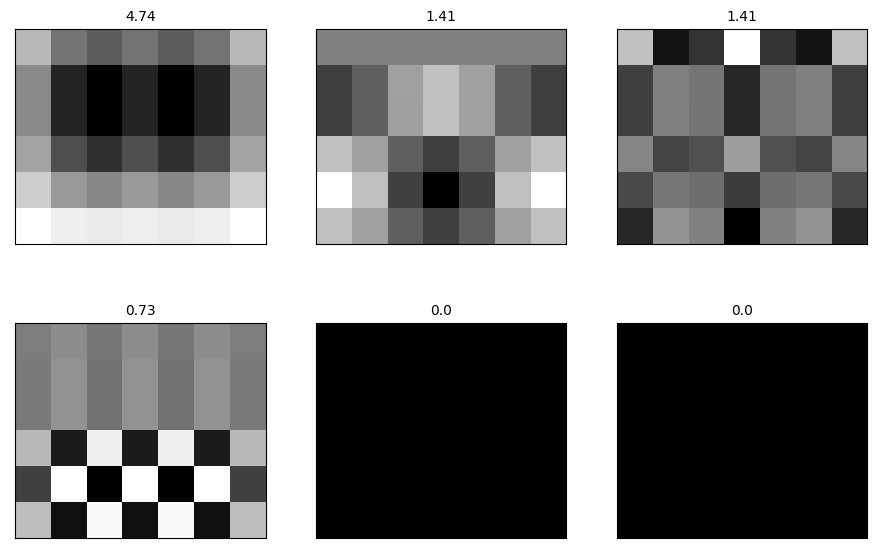

In [350]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-imgs[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

#### Wizualizacja kolejnych skumulowanych wartości osobliwych


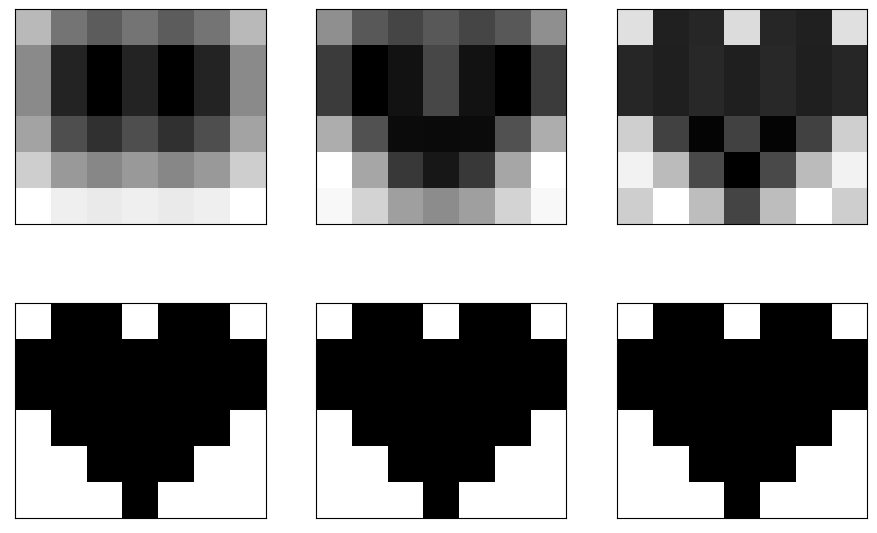

In [351]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-razem_imgs[i], cmap='gray')
plt.show()

#### Przykład rzeczywisty

In [352]:
n = len(most_sr)
U_m, S_m, V_m = svd(most_sr)

In [353]:
print(f'Macierz U ma wymiary {U_m.shape}')
print(f'Macierz S ma wymiary {S_m.shape}')
print(f'Macierz V ma wymiary {V_m.shape}')

Macierz U ma wymiary (427, 427)
Macierz S ma wymiary (427,)
Macierz V ma wymiary (640, 640)


In [354]:
k = 20
Uk_m=U_m[:,:k]
Sk_m=S_m[:k]
Vk_m=V_m[:k,:]

In [355]:
print(f'Macierz Uk ma wymiary {Uk_m.shape}')
print(f'Macierz Sk ma wymiary {Sk_m.shape}')
print(f'Macierz Vk ma wymiary {Vk_m.shape}')

Macierz Uk ma wymiary (427, 20)
Macierz Sk ma wymiary (20,)
Macierz Vk ma wymiary (20, 640)


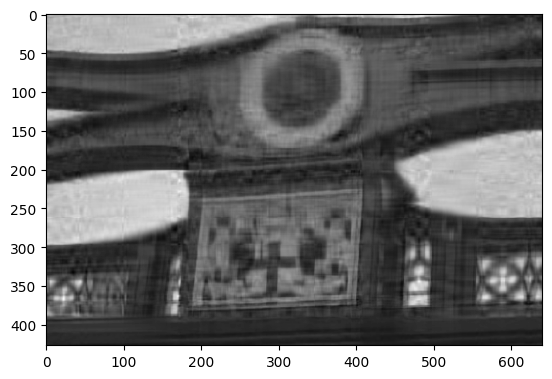

In [356]:
obraz = np.matmul(np.matmul(Uk_m, np.diag(Sk_m)), Vk_m)
plt.imshow(obraz, cmap='gray')
plt.show()

In [357]:
rozmiark = np.prod(Uk_m.shape)+np.prod(Sk_m.shape)+np.prod(Vk_m.shape)
print(f'Rozmiar danych to {rozmiark}, co stanowi {rozmiark/rozmiar:.2%}')

Rozmiar danych to 21360, co stanowi 2.61%


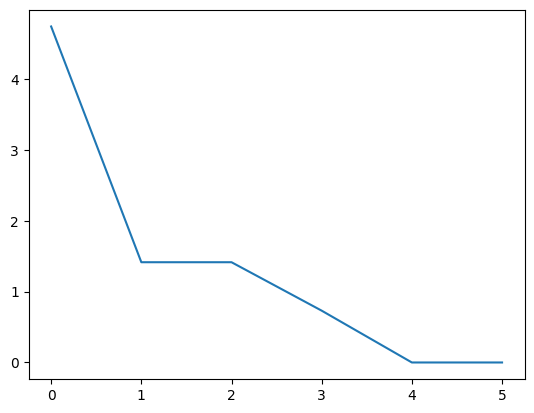

In [358]:
plt.plot(S);

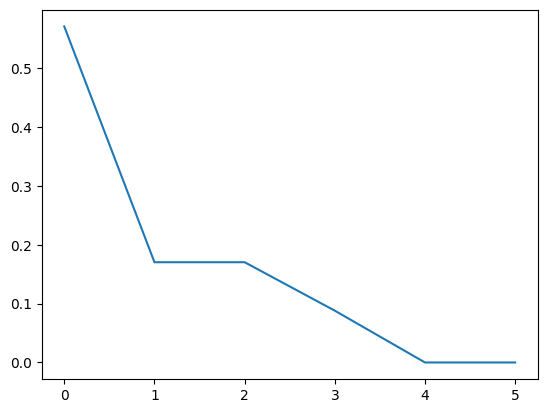

In [359]:
proc_waz = S/sum(S)
plt.plot(proc_waz[:10])

#### Zadanie - obrazy każdej wartości osobliwej

Przygotuj macierze rezprezentujące obrazy 60 pierwszych wartości osobliwych. 

In [360]:
# Miejsce na twój kod
imgs_m = []
for k in range (1, 61): 
    Uk_m=U_m[:,k-1:k]
    Vk_m=V_m[k-1:k,:]
    Sk_m=S_m[k-1:k]
    imgs_m.append(np.matmul(np.outer(Uk_m, Sk_m), Vk_m))


#### Zadanie - skumulowane obrazy kolejnych wartości osobliwych

Przygotuj macierze rezprezentujące obrazy skumulowanych kolejnych 60 pierwszych wartości osobliwych. 

In [361]:
# Miejsce na twój kod

razem_imgs_m = []
for k in range(0,len(imgs_m)):
    if k == 0:
        razem_imgs_m.append(imgs_m[0])
    else:
        razem_imgs_m.append(np.add(razem_imgs_m[k-1],imgs_m[k]))

#### Wizualizacja każdej wartości osobliwych


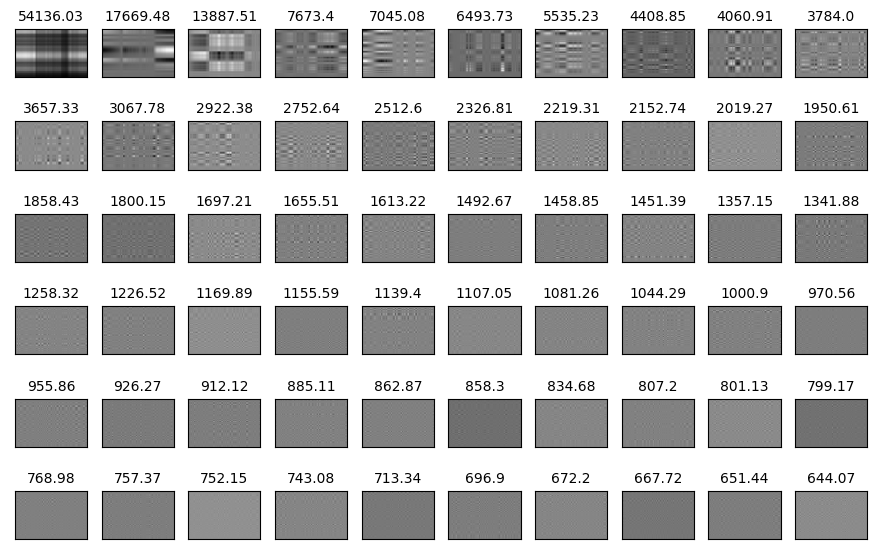

In [362]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs_m[i], cmap='gray')
    ax.set_title(np.round(S_m[i],2), fontsize=10)
plt.show()

#### Wizualizacja kolejnych skumulowanych wartości osobliwych


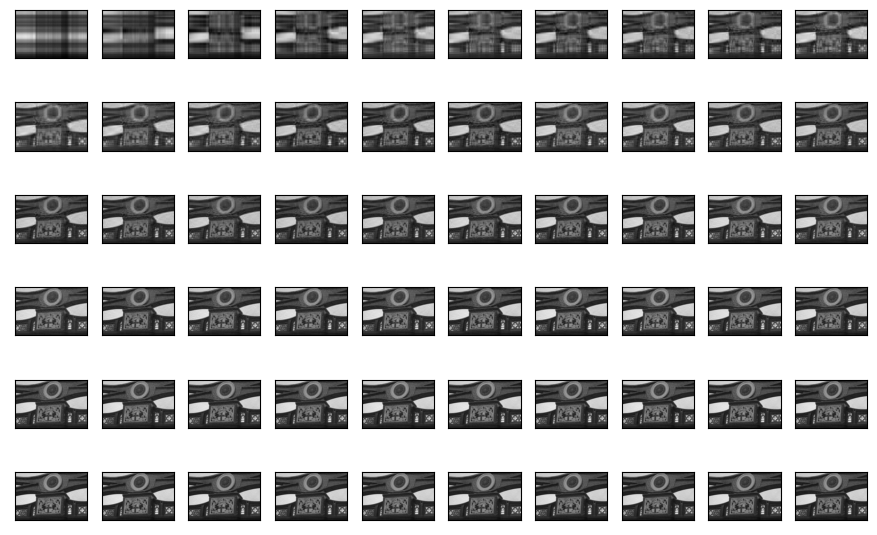

In [363]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(razem_imgs_m[i], cmap='gray')
plt.show()